<a href="https://colab.research.google.com/github/filipesartori/Inteligencia-Artificial/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rede Neuoral com TensorFlow


## Importação de Biblotecas

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.6.0'

## Carregamento da base de dados

In [2]:
dataset = pd.read_csv('/content/personagens.csv')

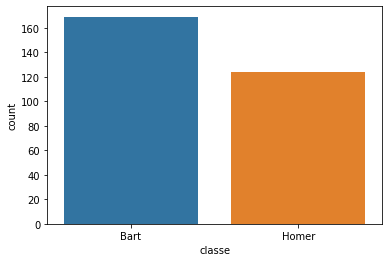

In [3]:
sns.countplot(x = 'classe', data=dataset)

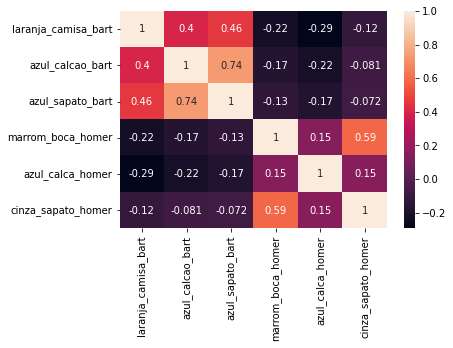

In [4]:
sns.heatmap(dataset.corr(), annot=True)

In [5]:
x = dataset.iloc[:, 0:6].values
x

array([[ 6.886102  ,  3.4952044 ,  1.4849836 ,  0.        ,  0.        ,
         0.06295441],
       [ 5.004901  ,  3.1838887 ,  1.0001415 ,  0.        ,  0.        ,
         0.03302354],
       [ 5.2646203 ,  5.0296826 ,  0.283567  ,  0.        ,  0.        ,
         0.15157256],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.        ,  4.2636285 ,
         0.07676148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.4291335 ,
         0.01701349],
       [ 0.        ,  0.        ,  0.        , 13.744248  ,  0.853902  ,
         0.0635462 ]])

In [6]:
y = dataset.iloc[:, 6].values
y

array(['Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
      

In [7]:
y = (y == 'Bart')
y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [8]:
from sklearn.model_selection import train_test_split
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size=0.2) 

## Treinamento da Rede

In [9]:
# Estrutura da rede neural
# (entradas + saidas) / 2
# 6 -> 4 -> 4 -> 4 -> 1 

In [10]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu', input_shape=(6,)))
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [11]:
rede_neural.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 28        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [12]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [13]:
historico = rede_neural.fit(x_treinamento, y_treinamento, epochs=50, validation_split=0.1)

Epoch 1/50
7/7 [==============================] - 1s 47ms/step - loss: 1.0914 - accuracy: 0.5667 - val_loss: 1.3073 - val_accuracy: 0.5000
Epoch 2/50
7/7 [==============================] - 0s 4ms/step - loss: 1.0286 - accuracy: 0.5714 - val_loss: 1.2279 - val_accuracy: 0.5000
Epoch 3/50
7/7 [==============================] - 0s 4ms/step - loss: 0.9707 - accuracy: 0.5857 - val_loss: 1.1498 - val_accuracy: 0.5000
Epoch 4/50
7/7 [==============================] - 0s 4ms/step - loss: 0.9173 - accuracy: 0.6000 - val_loss: 1.0749 - val_accuracy: 0.5417
Epoch 5/50
7/7 [==============================] - 0s 4ms/step - loss: 0.8596 - accuracy: 0.5952 - val_loss: 1.0093 - val_accuracy: 0.5417
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 0.8092 - accuracy: 0.5857 - val_loss: 0.9495 - val_accuracy: 0.5417
Epoch 7/50
7/7 [==============================] - 0s 4ms/step - loss: 0.7664 - accuracy: 0.6000 - val_loss: 0.8907 - val_accuracy: 0.5417
Epoch 8/50
7/7 [=================

## Avaliação da rede

In [14]:
historico.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

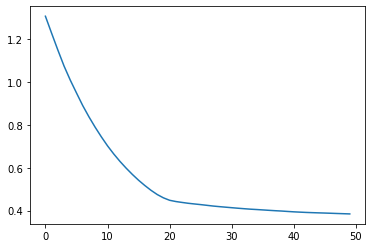

In [15]:
plt.plot(historico.history['val_loss'])

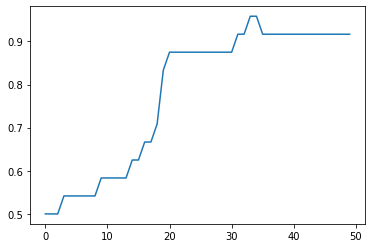

In [16]:
plt.plot(historico.history['val_accuracy'])

In [17]:
previsoes = rede_neural.predict(x_teste)
previsoes

array([[0.43168902],
       [0.49783882],
       [0.43168902],
       [0.98896146],
       [0.5261837 ],
       [0.43168902],
       [0.9999958 ],
       [0.51679975],
       [1.        ],
       [0.5267277 ],
       [0.47100148],
       [0.5249869 ],
       [0.99999976],
       [0.99935037],
       [0.43168902],
       [0.43168902],
       [0.43168902],
       [0.43168902],
       [0.43168902],
       [0.52602345],
       [0.43168902],
       [0.5216833 ],
       [0.43168902],
       [0.9982889 ],
       [0.43168902],
       [0.99999523],
       [0.5263238 ],
       [0.9536213 ],
       [0.9593841 ],
       [0.9999126 ],
       [0.999998  ],
       [0.43168902],
       [0.90699923],
       [0.9999992 ],
       [0.5254316 ],
       [1.        ],
       [0.5251379 ],
       [0.4381091 ],
       [1.        ],
       [0.48260424],
       [0.99996847],
       [0.43168902],
       [0.9998699 ],
       [0.43168902],
       [0.99999976],
       [0.52638024],
       [0.526727  ],
       [0.999

In [18]:
previsoes = (previsoes > 0.5)
previsoes

array([[False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False]])

In [19]:
y_teste

array([False,  True, False,  True,  True, False,  True, False,  True,
        True, False, False,  True,  True, False, False, False, False,
       False,  True, False,  True, False,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,  True, False,  True, False,  True, False,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
       False,  True, False,  True, False])

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(previsoes, y_teste)

0.9152542372881356

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, previsoes)
cm

array([[22,  4],
       [ 1, 32]])

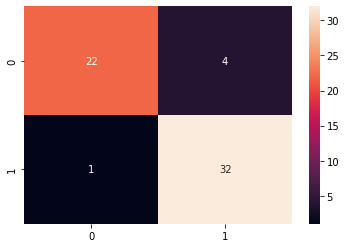

In [23]:
sns.heatmap(cm, annot=True)